In [1]:
from google.colab import drive
drive.mount("/content/drive")
import os
os.chdir("/content/drive/MyDrive/BERT")
import re
import numpy as np
from matplotlib import pyplot as plt
import random

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install vncorenlp
from vncorenlp import VnCoreNLP

# Read data

In [3]:
def read_data(path):
  with open(path) as f:
    data = f.read().splitlines()
  return data

In [4]:
data = read_data("SmallDataset/data.txt")
label = read_data("SmallDataset/label.txt")

In [5]:
for i in range(5):
  print("text: ", data[i], "\nlabel: ", label[i])

text:  Việc để bàn làm việc ngăn nắp cũng thể hiện thái độ làm việc cẩn thận và phong cách chuyên nghiệp của bạn. 
label:  Đời sống.txt
text:  Có lẽ vì nằm ở vùng cồn bãi hẻo lánh nên ông chủ lò này cứ vô tư làm thịt khỉ ngay sân nhà không hề che đậy. 
label:  Khoa học.txt
text:  Taylor Swift đã gửi tặng người hâm mộ món quà nhỏ nhưng vô cùng ngọt ngào là hoa và thiệp mừng nhân ngày cưới của họ. 
label:  Giải trí.txt
text:  Trong buổi họp báo tại Copenhagen (Đan Mạch) ngày 23-1, cựu lãnh đạo ly khai vùng Catalonia để ngỏ khả năng trở về Tây Ban Nha nhưng tuyên bố việc ông một lần nữa lên nắm quyền là điều tốt cho nền dân chủ nước này. 
label:  Thế giới.txt
text:  Theo thông tin từ TAND TP Hà Nội, vào ngày 28/8 tới, cơ quan này sẽ mở lại phiên tòa sơ thẩm xét xử bị cáo Hà Văn Thắm (SN 1972) - nguyên Chủ tịch HĐQT Ngân hàng TMCP Đại Dương (Oceanbank) cùng các đồng phạm do liên quan đến sai phạm xảy ra tại ngân hàng này. 
label:  None.txt


# Clear data:

Remove special character that doesn't have particular meaning.

Remove http link.

Remove ", ', (, ).

Remove end line character "\n".

Remove consecutive punctuation marks.

Tokenize text.

In [6]:
def clear_text(data):
  result = []
  for item in data:
    text = re.sub(r'@[A-Za-z0-9]+', '', item)
    #text = re.sub(r"[#&/-]", "", text)
    text = re.sub(r"[()]", "",text)
    text = re.sub(r"[\'\"]", "", text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
    #text = re.sub(r"[0-9]+", '', text)
    text = text.replace("\n", ".")
    result.append(text)
  return result

In [7]:
clear_data = clear_text(data)

for i in range(5):
  print("text: ", clear_data[i], "\nlabel: ", label[i])

text:  Việc để bàn làm việc ngăn nắp cũng thể hiện thái độ làm việc cẩn thận và phong cách chuyên nghiệp của bạn. 
label:  Đời sống.txt
text:  Có lẽ vì nằm ở vùng cồn bãi hẻo lánh nên ông chủ lò này cứ vô tư làm thịt khỉ ngay sân nhà không hề che đậy. 
label:  Khoa học.txt
text:  Taylor Swift đã gửi tặng người hâm mộ món quà nhỏ nhưng vô cùng ngọt ngào là hoa và thiệp mừng nhân ngày cưới của họ. 
label:  Giải trí.txt
text:  Trong buổi họp báo tại Copenhagen Đan Mạch ngày 23-1, cựu lãnh đạo ly khai vùng Catalonia để ngỏ khả năng trở về Tây Ban Nha nhưng tuyên bố việc ông một lần nữa lên nắm quyền là điều tốt cho nền dân chủ nước này. 
label:  Thế giới.txt
text:  Theo thông tin từ TAND TP Hà Nội, vào ngày 28/8 tới, cơ quan này sẽ mở lại phiên tòa sơ thẩm xét xử bị cáo Hà Văn Thắm SN 1972 - nguyên Chủ tịch HĐQT Ngân hàng TMCP Đại Dương Oceanbank cùng các đồng phạm do liên quan đến sai phạm xảy ra tại ngân hàng này. 
label:  None.txt


In [8]:
def remove_consecutive_punctuation_mark(data):
  result = []
  for text in data:
    text = "".join(re.split(r"([.,/#!$%^&*;:{}=_`~()-])[.,/#!$%^&*;:{}=_`~()-]+", text))
    result.append(text)
  return result

In [9]:
no_consecutive_punctuation_mark = remove_consecutive_punctuation_mark(clear_data)

In [10]:
tokenizer = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

In [11]:
from tqdm import tqdm

In [12]:
def tokenize_data(data):
  result = []
  ids = []
  for ind, item in tqdm(enumerate(data), total=len(data)):
    text = tokenizer.tokenize(item)
    res = ""
    try:
      for words in text[0]:
        if words in [".", ",", ";", "!", "?", ":"]:
          res += words
        else:
          res += " " + words
      result.append(res)
      ids.append(ind)
    except:
      pass
  return ids, result

In [13]:
ids, tokenized_data = tokenize_data(no_consecutive_punctuation_mark)

100%|██████████| 200000/200000 [10:07<00:00, 329.17it/s]


In [14]:
random.sample(tokenized_data, 10)

[' Chính vì_vậy, các nhà_nghiên_cứu cần phải tìm_kiếm thêm nhiều tác_nhân gắn vào gen nhạy sáng đối_với các cường_độ ánh_sáng khác nhau, thậm_chí phải chế_tạo ra những loại kính đeo mắt đặc_biệt để giúp tập_trung ánh_sáng giống như chiếc máy_ảnh tự_động vậy.',
 ' Tromso có 60 đêm Bắc_Cực vào mùa Đông, khi Mặt_Trời không_thể nhô lên quá đường chân_trời; đồng_thời cũng có đến 60 ngày Mặt_Trời không lặn với những buổi hoà_nhạc bắt_đầu lúc nửa_đêm, khi ánh nắng vẫn chan_hoà khắp chốn.',
 ' Theo bà Mai, sau khi phân_tích hồ_sơ bệnh_án, nghe báo_cáo của các bệnh_viện liên_quan, hội_đồng chuyên_môn kết_luận chị Quý 22 tuổi tử_vong là do hệ_thống lupus ban đỏ tiềm_ẩn trên thai_phụ bùng_phát cấp_tính.',
 ' Paul là một trong những nơi lạnh nhất ở Mỹ, cũng là một trong những điểm ngắm tuyết ngoạn_mục nhất thu_hút hàng ngàn du_khách mỗi năm.',
 ' Với 5 chức vô_địch giành được ở các nội_dung thi_đấu, điền_kinh Việt_Nam đã trải qua_ngày thi_đấu thành_công nhất từ đầu SEA_Games 29.',
 ' Nhược_điểm củ

In [15]:
label = np.array(label)
label = label[ids]

# Explore data:
Plot data length.

In [16]:
# get text_length
len_data = np.array([len(text.split()) for text in tokenized_data])

In [17]:
np.mean(len_data), np.var(len_data)

(29.19038571157135, 187.43439740015305)

{'boxes': [<matplotlib.lines.Line2D at 0x7f52bb32b110>],
 'caps': [<matplotlib.lines.Line2D at 0x7f52bb336190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f52bb33d710>],
 'means': [<matplotlib.lines.Line2D at 0x7f52b4e18690>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52bb336c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f52bb32b6d0>,
  <matplotlib.lines.Line2D at 0x7f52bb32bc10>]}

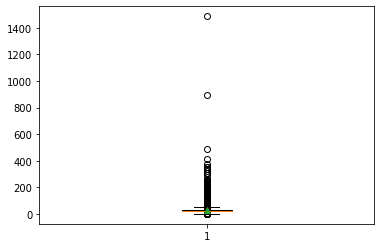

In [18]:
plt.boxplot(len_data, showmeans=True)

In [19]:
len2 = [len_text for len_text in len_data if len_text < 1000]

{'boxes': [<matplotlib.lines.Line2D at 0x7f52ba845090>],
 'caps': [<matplotlib.lines.Line2D at 0x7f52ba84b090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f52ba854610>],
 'means': [<matplotlib.lines.Line2D at 0x7f52ba8540d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52ba84bb50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f52ba8455d0>,
  <matplotlib.lines.Line2D at 0x7f52ba845b10>]}

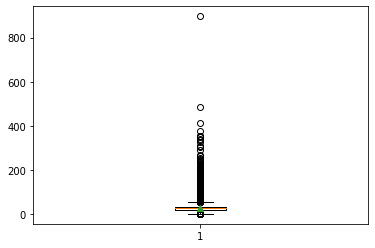

In [20]:
plt.boxplot(len2, showmeans = True)

(array([2.46120e+04, 1.36946e+05, 3.03440e+04, 5.71200e+03, 1.43100e+03,
        4.89000e+02, 2.21000e+02, 8.90000e+01, 5.20000e+01, 3.60000e+01,
        2.20000e+01, 1.10000e+01, 6.00000e+00, 5.00000e+00, 3.00000e+00,
        0.00000e+00, 1.00000e+00, 3.00000e+00, 3.00000e+00, 3.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  1.  ,  18.92,  36.84,  54.76,  72.68,  90.6 , 108.52, 126.44,
        144.36, 162.28, 180.2 , 198.12, 216.04, 233.96, 251.88, 269.8 ,
        287.72, 305.64, 323.56, 341.48, 359.4 , 377.32, 395.24, 413.16,
        431.08, 449.  , 466.92, 484.84, 502.76, 520.

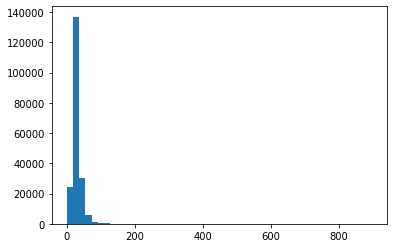

In [21]:
plt.hist(len2, bins = 50)

Most of data example has length less than 70.

Mean of length is 32.605.

It's seem like a good idea to just work with short text and truncate long text into multiple texts.

# Process new data with max_length of 62 words.

In [22]:
# def process_data(data):
#   result = []
#   ind = []
#   for id, text in enumerate(data):
#     len_text = len(text.split())
#     if len_text > 62:
#       new_text = " ".join(text.split()[:62])
#       result.append(new_text)
#       ind.append(id)
#     else:
#       result.append(text)
#   return ind, result

In [23]:
# ind, short_data = process_data(tokenized_data)

In [24]:
# for i in range(5):
#   print("text: ", short_data[ind[i]], "\nlabel", label[ind[i]])

In [25]:
final_data = remove_consecutive_punctuation_mark(tokenized_data)

In [26]:
def punctuation_split(data):
  result = []
  for text in tqdm(data, total=len(data)):
    res_text = ""
    for char in text:
      if char in [".", ",", ";", "!", "?", ":"]:
        res_text += " " + char
      else:
        res_text += char
    result.append(res_text)
  return result

In [27]:
final_data = punctuation_split(final_data)

100%|██████████| 199994/199994 [00:08<00:00, 24838.23it/s]


In [28]:
len(final_data)

199994

In [29]:
random.sample(final_data, 5)

[' Với tốc_độ 40 km/h , thu gọn người suốt quãng đường dài gần 90 km là một thử_thách lớn với bất_cứ tay_lái nào .',
 ' Các chất trung vi_lượng sẽ giúp chống khô cành , vàng_lá , rụng hoa , rụng trái trên cây cà_phê , điều , hồ_tiêu , giúp tăng khả_năng chống chịu sâu_bệnh , nâng cao năng_suất và phẩm_chất nông_sản .',
 ' Do số_lượng lợn chết quá nhiều , trong chiều nay lực_lượng chức_năng mới tiêu_huỷ được khoảng 300 con .',
 ' Vì là người gốc Nepal nên Pradhan sẽ triển_khai một chương_trình thử_nghiệm khá lớn tại Nepal vào tháng 11 năm nay .',
 ' Mọi sự chú_ý tại khoá họp Đại_Hội_đồng LHQ năm nay tập_trung chủ_yếu vào Tổng_thống Donald_Trump , người đã có bài phát_biểu dài 40 phút về an_ninh , chủ_quyền và chống khủng_bố .']

# Save dataset with two versions.
Large version: With all about 200000 texts.

Small version: With 80000 texts.

In [30]:
def write_data(data, path):
  with open(path, "w+") as f:
    for item in data:
      f.write(item + "\n") 

In [31]:
# get small version by shuffle and get sample
c = list(zip(final_data, label))
random.shuffle(c)
final_data, label = zip(* c)

small_version_data, small_version_label = final_data[:80000], label[:80000]

In [32]:
write_data(final_data, "200k_dataset/data.txt")
write_data(label, "200k_dataset/label.txt")

write_data(small_version_data, "80k_dataset/data.txt")
write_data(small_version_label, "80k_dataset/label.txt")